In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
df=pd.read_csv("//content/diabetes.csv")

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.where(df["Age"] == 0).value_counts().sum()

0

In [ ]:
df.where(df["DiabetesPedigreeFunction"]==0).value_counts().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110211da10>,
      dtype=object)

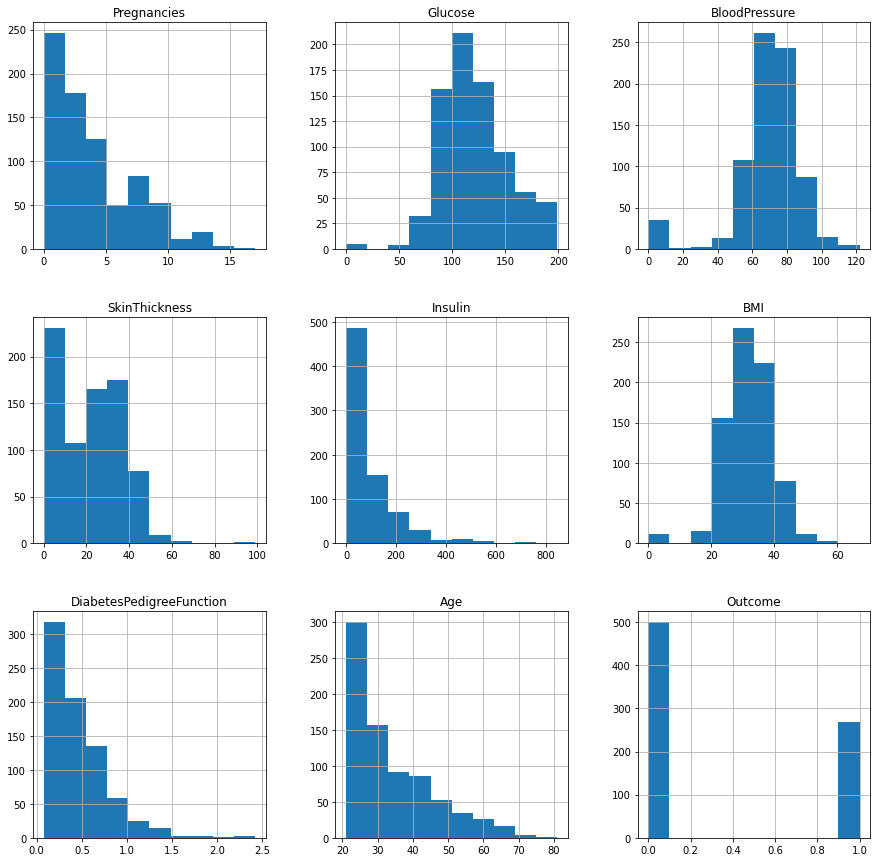

In [ ]:
df.hist(figsize=(15,15))

In [ ]:
df.corr()["Outcome"].sort_values(ascending=False) #with missing values

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [ ]:
df.isnull().sum()  # There are missing values but they are shown as 0. 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Glucose, bloodpres,skinthick,insulin,bmi--- Value of 0 shows the missing data in these columns.

In [ ]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [ ]:
df.isnull().sum() # Now, missing values can be seen.

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

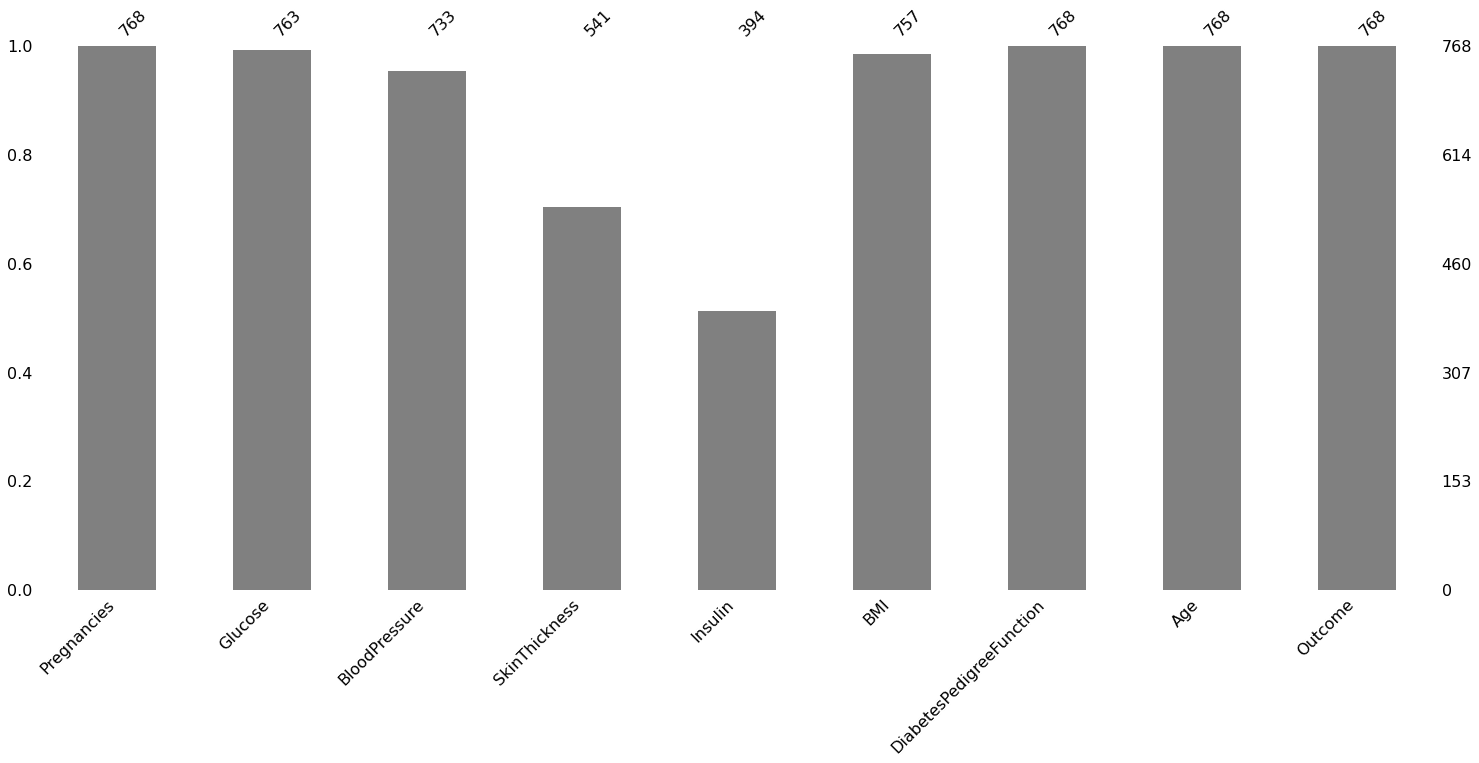

In [ ]:
msno.bar(df,color="gray")

In [ ]:
##  https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e -- Handling the missing values.

df["Glucose"].fillna(df["Glucose"].mean(), inplace = True )
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True ) #ML modeli ile doldurma denenebilir. Cok missing value var.
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True ) #ML modeli ile doldurma denenebilir. Cok missing value
df["BMI"].fillna(df["BMI"].mean(), inplace = True ) 

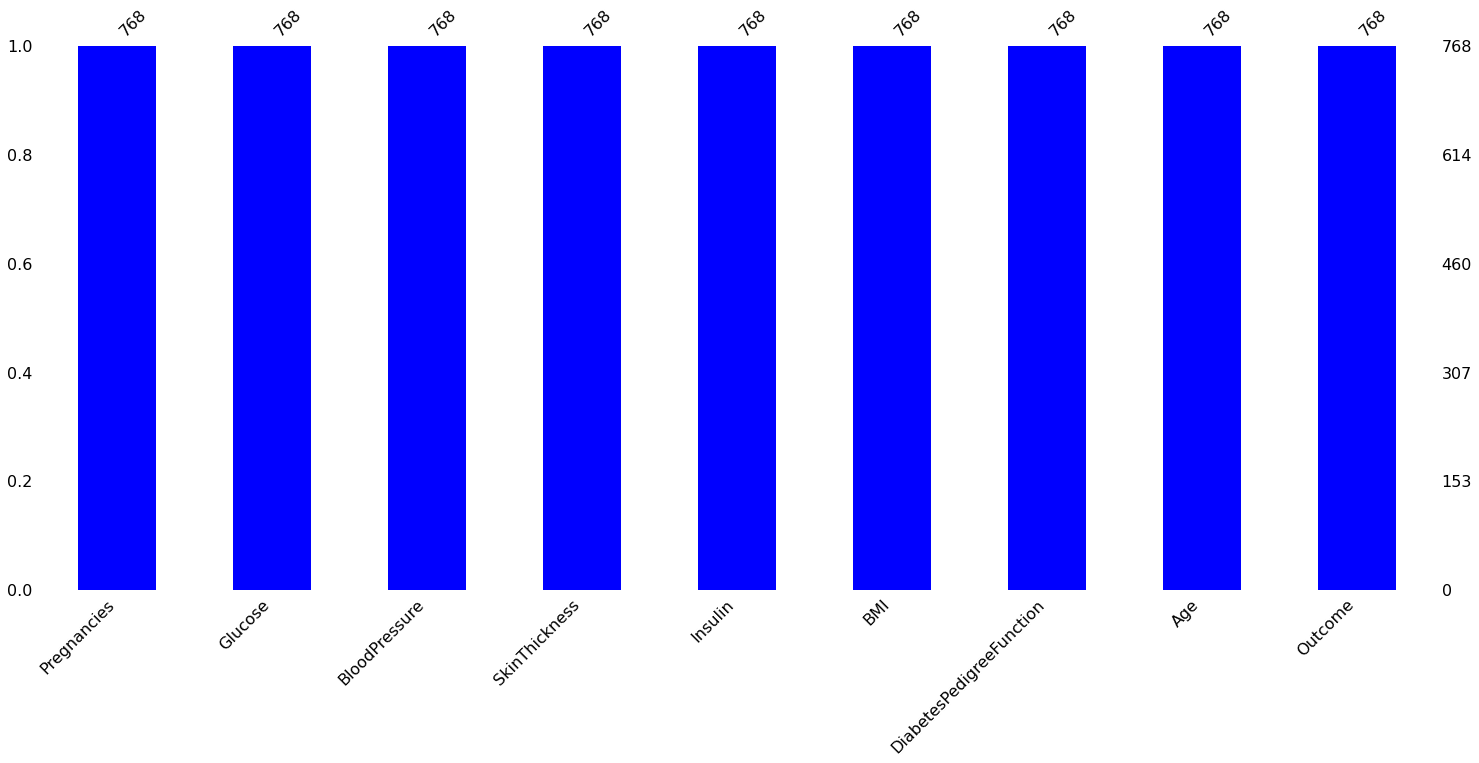

In [ ]:
import missingno as msno #nan count visualization
msno.bar(df,color="blue") # all missing values are replaced

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1101db2950>,
      dtype=object)

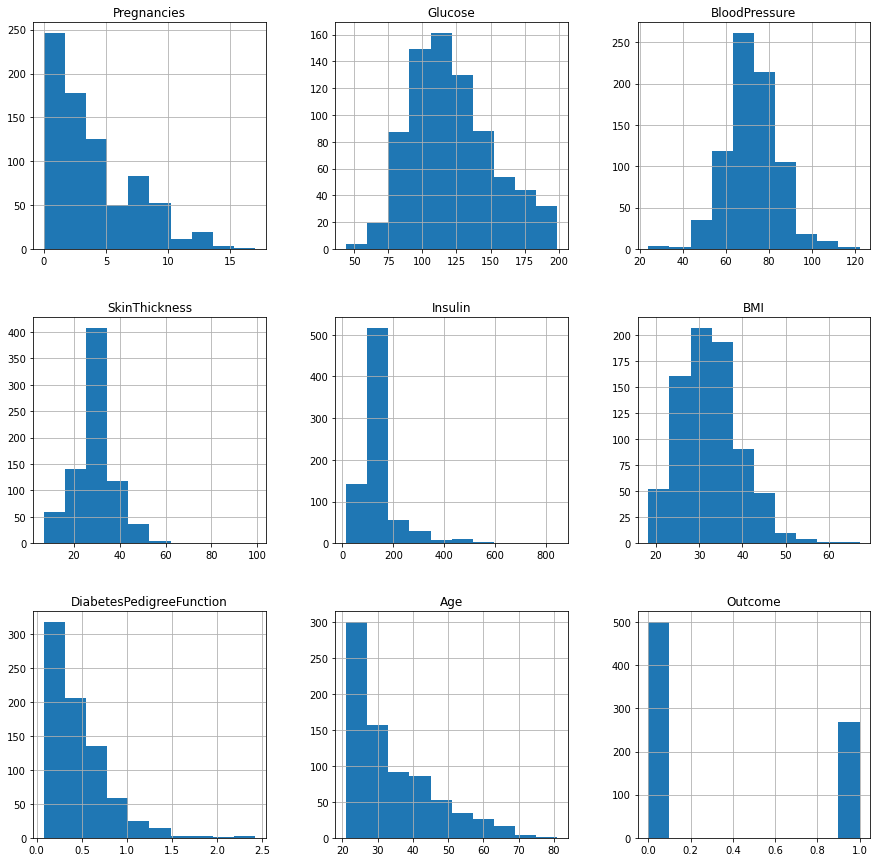

In [ ]:
df.hist(figsize=(15,15))

In [ ]:
df.corr()["Outcome"].sort_values(ascending=False) #No missing values

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

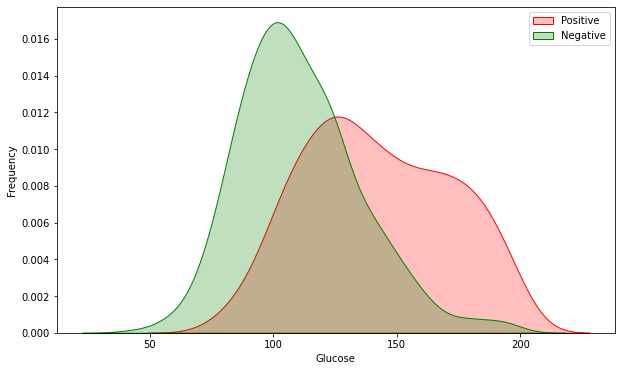

In [ ]:
plt.figure(figsize=(10,6))
grp = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade = True)
grp = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax =grp, color="Green", shade= True)
grp.set_xlabel("Glucose")
grp.set_ylabel("Frequency")
grp.legend(["Positive","Negative"])

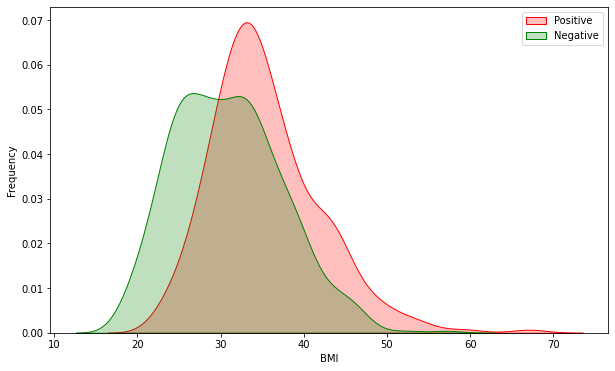

In [ ]:
plt.figure(figsize=(10,6))
grp = sns.kdeplot(df["BMI"][df["Outcome"] == 1], color="Red", shade = True)
grp = sns.kdeplot(df["BMI"][df["Outcome"] == 0], ax =grp, color="Green",shade=True)
grp.set_xlabel("BMI")
grp.set_ylabel("Frequency")
grp.legend(["Positive","Negative"])

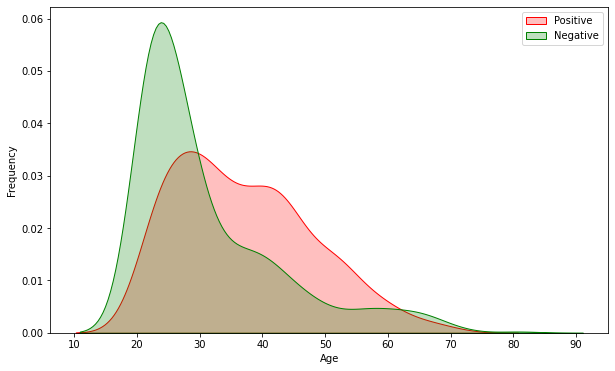

In [ ]:
plt.figure(figsize=(10,6))
grp = sns.kdeplot(df["Age"][df["Outcome"] == 1], color="Red", shade = True)
grp = sns.kdeplot(df["Age"][df["Outcome"] == 0], ax =grp, color="Green", shade= True)
grp.set_xlabel("Age")
grp.set_ylabel("Frequency")
grp.legend(["Positive","Negative"])

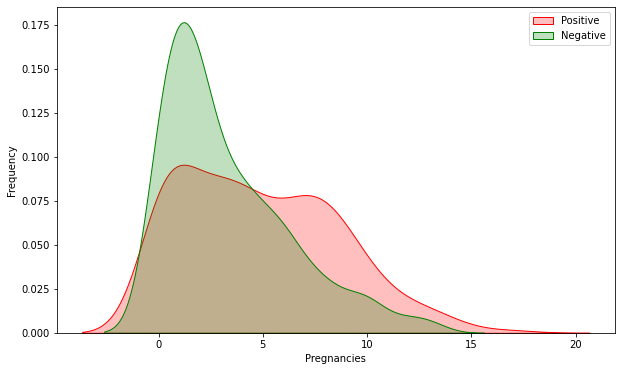

In [ ]:
plt.figure(figsize=(10,6))
grp = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color="Red", shade = True)
grp = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax =grp, color="Green", shade= True)
grp.set_xlabel("Pregnancies")
grp.set_ylabel("Frequency")
grp.legend(["Positive","Negative"])

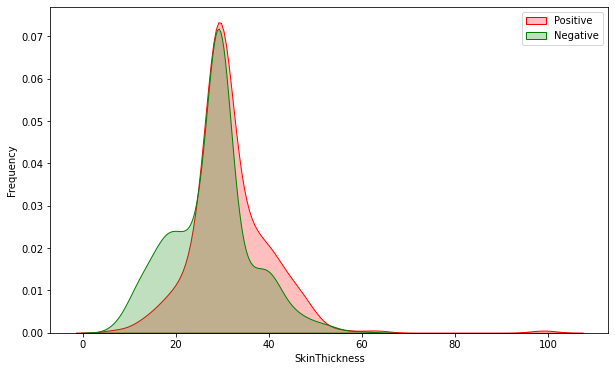

In [ ]:
plt.figure(figsize=(10,6))
grp = sns.kdeplot(df["SkinThickness"][df["Outcome"] == 1], color="Red", shade = True)
grp = sns.kdeplot(df["SkinThickness"][df["Outcome"] == 0], ax =grp, color="Green", shade= True)
grp.set_xlabel("SkinThickness")
grp.set_ylabel("Frequency")
grp.legend(["Positive","Negative"])

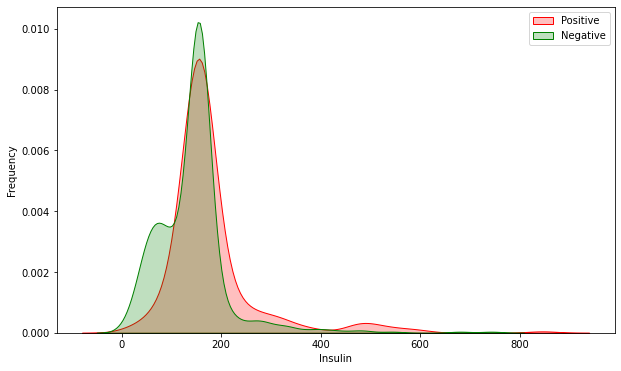

In [ ]:
plt.figure(figsize=(10,6))
grp = sns.kdeplot(df["Insulin"][df["Outcome"] == 1], color="Red", shade = True)
grp = sns.kdeplot(df["Insulin"][df["Outcome"] == 0], ax =grp, color="Green", shade= True)
grp.set_xlabel("Insulin")
grp.set_ylabel("Frequency")
grp.legend(["Positive","Negative"])

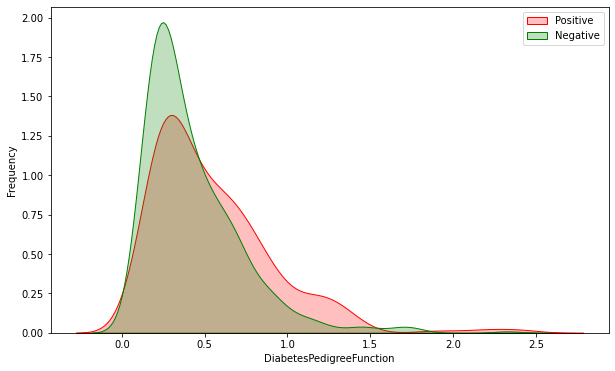

In [ ]:
plt.figure(figsize=(10,6))
grp = sns.kdeplot(df["DiabetesPedigreeFunction"][df["Outcome"] == 1], color="Red", shade = True)
grp = sns.kdeplot(df["DiabetesPedigreeFunction"][df["Outcome"] == 0], ax =grp, color="Green", shade= True)
grp.set_xlabel("DiabetesPedigreeFunction")
grp.set_ylabel("Frequency")
grp.legend(["Positive","Negative"])

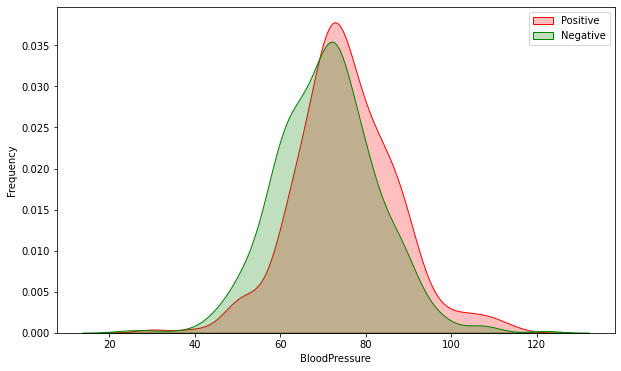

In [ ]:
plt.figure(figsize=(10,6))
grp = sns.kdeplot(df["BloodPressure"][df["Outcome"] == 1], color="Red", shade = True)
grp = sns.kdeplot(df["BloodPressure"][df["Outcome"] == 0], ax =grp, color="Green", shade= True)
grp.set_xlabel("BloodPressure")
grp.set_ylabel("Frequency")
grp.legend(["Positive","Negative"])

In [ ]:
#sns.pairplot(df,hue="Outcome")

In [ ]:
meandf0=df[df["Outcome"]==0].mean()
meandf1=df[df["Outcome"]==1].mean()
meandf0.pop("Outcome")
meandf1.pop("Outcome")


1.0

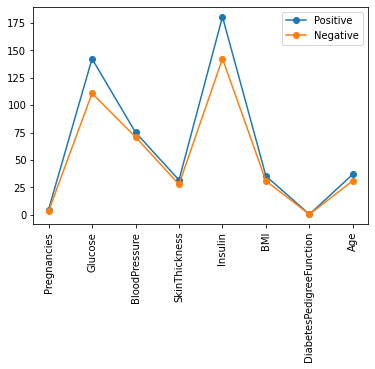

In [ ]:
fig, ax =plt.subplots() ## Not an efficient way to visualize !! 
ax.plot(meandf1,marker="o")
ax.plot(meandf0,marker="o")
plt.xticks(rotation=90)
plt.legend(["Positive","Negative"])
plt.show()

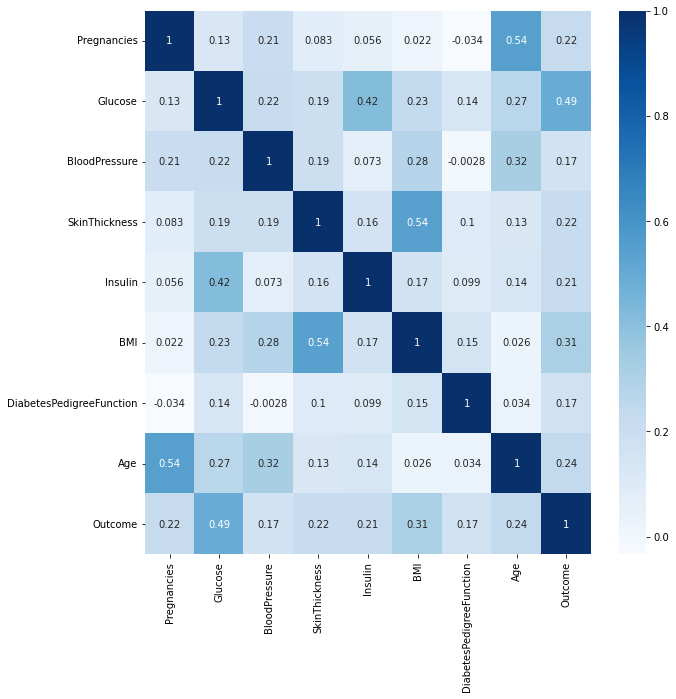

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap="Blues")

In [ ]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # Scaling is important for kNN classifier. Distance based classifier.
x=pd.DataFrame(scaler.fit_transform(x),columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI", "DiabetesPedigreeFunction", "Age"])


In [ ]:
x.head() #Scaled data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier().fit(x_train,y_train) # Default neighbors=5

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
knn.score(x_test,y_test)

0.7272727272727273

In [ ]:
# Optimizing the k parameter
scoreTest=[]
scoreTrain=[]
kparams=[5,6,8,11,13,15,18,21]

for x in kparams:
  knn=KNeighborsClassifier(n_neighbors = x)
  knn.fit(x_train,y_train)
  scoreTest.append(knn.score(x_test,y_test))
  scoreTrain.append(knn.score(x_train,y_train))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.7, 0.85)

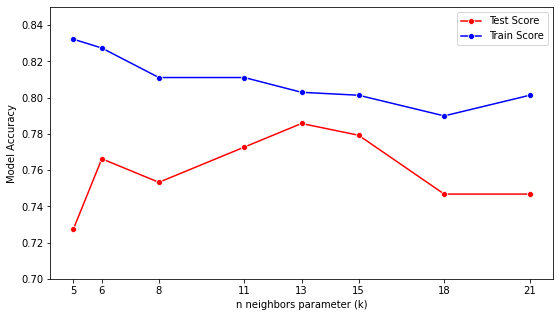

In [ ]:
plt.figure(figsize=(9,5))
sns.lineplot(kparams,scoreTest,marker="o",color="r",label="Test Score")
sns.lineplot(kparams,scoreTrain,marker="o",color="b",label="Train Score")
plt.xlabel("n neighbors parameter (k)")
plt.ylabel("Model Accuracy")
plt.xticks(kparams)
plt.ylim(0.7,0.85)

In [ ]:
# k parameter is optimal at 13. 
knn13 = KNeighborsClassifier(13)
knn13.fit(x_train,y_train)
y_pred=knn13.predict(x_test)
print(knn13.score(x_test,y_test))

0.7857142857142857


In [ ]:
# https://coderedirect.com/questions/581592/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
ypred_pr = knn13.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,ypred_pr)
roc_auc=auc(fpr,tpr)

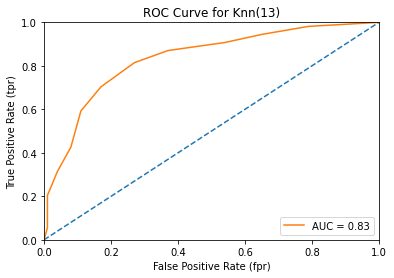

In [ ]:
plt.plot([0.0,1.0],[0.0,1.0],"--")
plt.plot(fpr,tpr,label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.title("ROC Curve for Knn(13)")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()